In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Load the dataset
file_path = "hydroponic_farming_dataset.csv"
data = pd.read_csv(file_path)

#Encode categorical "Crop" column
label_encoder = LabelEncoder()
data["Crop"] = label_encoder.fit_transform(data["Crop"])

# Print crop encoding mapping from your dataset
crop_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Crop Encoding in Dataset:", crop_mapping)

# Define Features (X) and Target Variable (y)
X = data.drop(columns=["pH"]) 
y = data["pH"]  

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Crop Encoding in Dataset: {'Bell Pepper': 0, 'Bitter Gourd': 1, 'Carrot': 2, 'Corn': 3, 'Cucumber': 4, 'Eggplant': 5, 'Green Chili': 6, 'Lettuce': 7, 'Mustard Greens': 8, 'Pechay': 9, 'Squash': 10, 'Tomato': 11, 'Watermelon': 12}


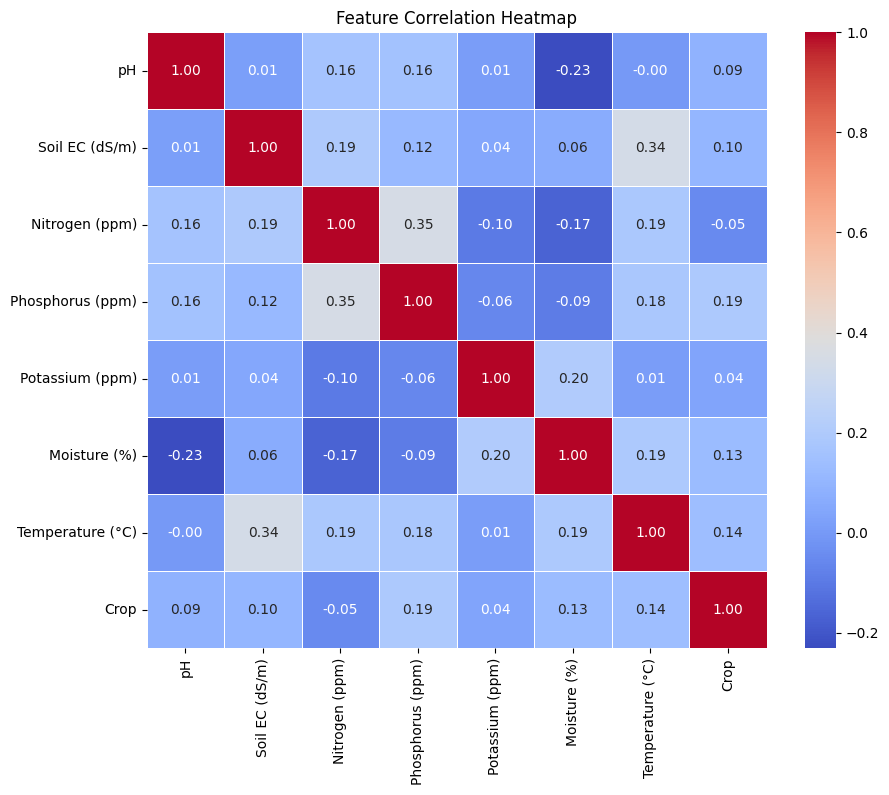

In [4]:
# Encode categorical "Crop" column
data["Crop"] = data["Crop"].astype("category").cat.codes

# Compute the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

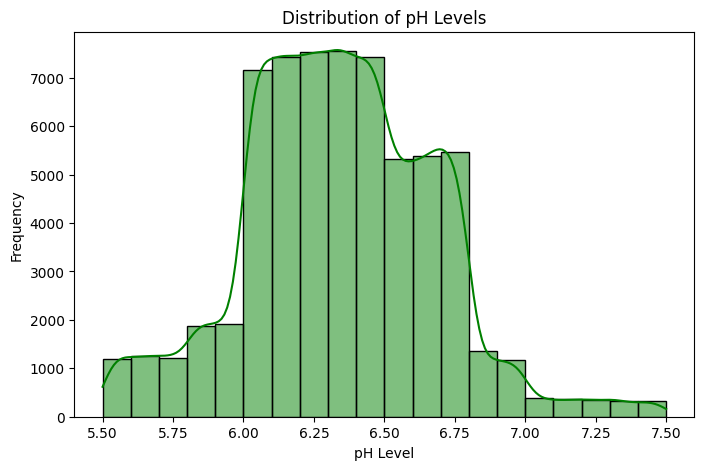

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data["pH"], bins=20, kde=True, color="green")
plt.title("Distribution of pH Levels")
plt.xlabel("pH Level")
plt.ylabel("Frequency")
plt.show()


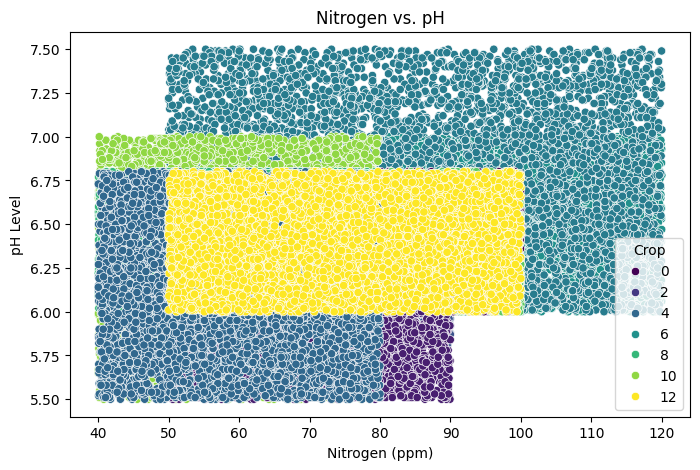

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Nitrogen (ppm)"], y=data["pH"], hue=data["Crop"], palette="viridis")
plt.title("Nitrogen vs. pH")
plt.xlabel("Nitrogen (ppm)")
plt.ylabel("pH Level")
plt.legend(title="Crop")
plt.show()


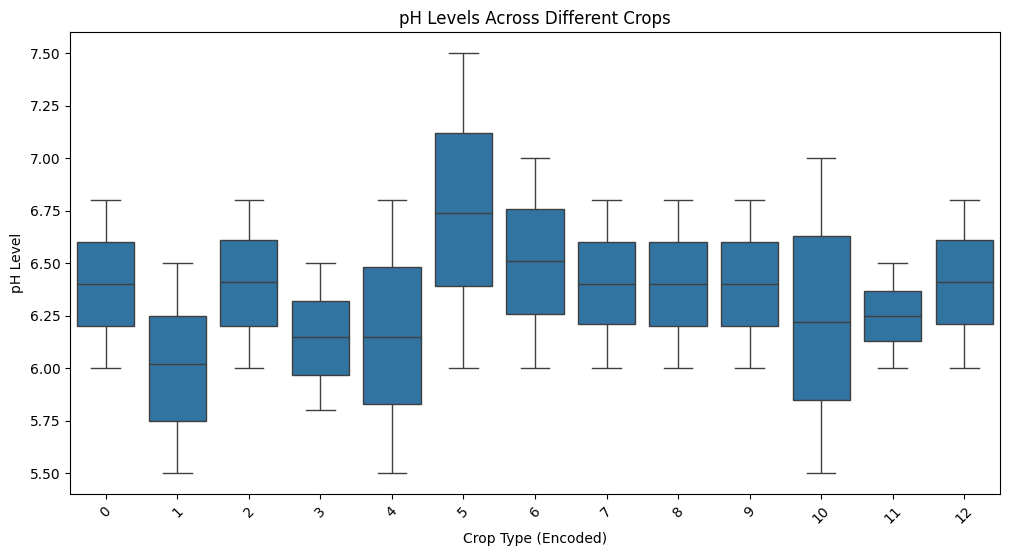

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Crop"], y=data["pH"])
plt.title("pH Levels Across Different Crops")
plt.xlabel("Crop Type (Encoded)")
plt.ylabel("pH Level")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Train Linear Regression using Stochastic Gradient Descent (SGDRegressor)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_sgd = sgd_reg.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

In [9]:
# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)


In [24]:
# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [26]:
# Compare Model Performance
mse_results = {
    "SGDRegressor (Linear)": mse_sgd,
    "Decision Tree": mse_dt,
    "Random Forest": mse_rf
}
best_model_name = min(mse_results, key=mse_results.get)

if best_model_name == "SGDRegressor (Linear)":
    best_model = sgd_reg
elif best_model_name == "Decision Tree":
    best_model = dt_reg
else:
    best_model = rf_reg

#Save the Best Model
with open("best_hydroponic_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Print Results
print("\nModel Performance Comparison:")
for model, mse in mse_results.items():
    print(f"{model}: MSE = {mse:.4f}")

print(f"\nBest Model: {best_model_name} (Saved as 'best_hydroponic_model.pkl')")




Model Performance Comparison:
SGDRegressor (Linear): MSE = 0.1037
Decision Tree: MSE = 0.1665
Random Forest: MSE = 0.0872

Best Model: Random Forest (Saved as 'best_hydroponic_model.pkl')


In [16]:
#Make a Prediction on One Data Point
one_sample = X_test[0].reshape(1, -1)  # Select one row from the test dataset
predicted_ph = best_model.predict(one_sample)
print(f"\nPredicted pH for one test data point: {predicted_ph[0]:.4f}")


Predicted pH for one test data point: 6.3822


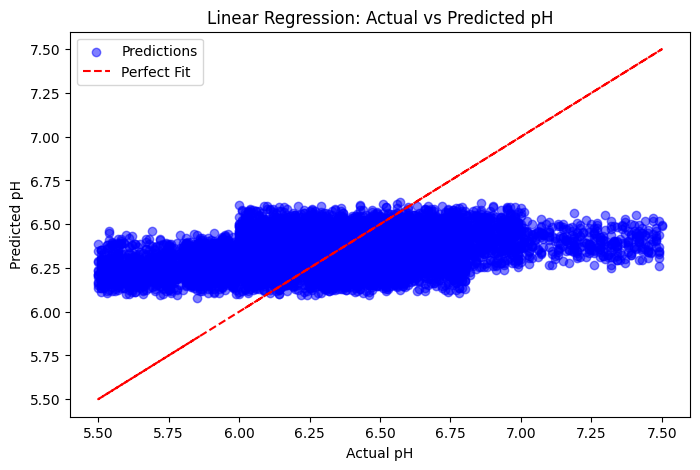

In [17]:
#Scatter Plot of the Linear Regression Model
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_sgd, alpha=0.5, color="blue", label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Linear Regression: Actual vs Predicted pH")
plt.legend()
plt.show()